# Preparativos

## Importacion de librerias

In [43]:
#Importando librerias
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

## Importacion de Archivos

In [140]:
# Funcion para leer la ruta de los archivos
def obtener_pacientes(ruta_archivo):
    df = pd.read_csv(ruta_archivo)
    return df
# Variables de las rutas de los Archivos
ruta_sanos = "D:/Documents/Python/Enfermedades analisis/Grupo_1/Pacientes_sanos.csv"
ruta_enfermos = "D:/Documents/Python/Enfermedades analisis/Grupo_2/Pacientes_enfermos.csv"
# Variables de los pacientes
df_sanos = obtener_pacientes(ruta_sanos)
df_enfermos = obtener_pacientes(ruta_enfermos)
# Imprsion en consola de las listas de los pacientes
print("Pacientes sanos:", df_sanos)
print("Pacientes enfermos:", df_enfermos)

Pacientes sanos:          Paciente  Tiempos de interlatido
0       Paciente1                   0.711
1       Paciente2                   1.016
2       Paciente3                   0.734
3       Paciente4                   0.719
4       Paciente5                   0.656
...           ...                     ...
144604  Paciente5                   0.641
144605  Paciente5                   0.641
144606  Paciente5                   0.641
144607  Paciente5                   0.641
144608  Paciente5                   0.633

[144609 rows x 2 columns]
Pacientes enfermos:          Paciente  Tiempos de interlatido
0       Paciente1                   0.828
1       Paciente2                   0.864
2       Paciente3                   0.620
3       Paciente4                   0.724
4       Paciente5                   0.708
...           ...                     ...
139278  Paciente3                   0.544
139279  Paciente3                   0.532
139280  Paciente3                   0.536
139281  Paci

## Creación del archivo CSV

In [124]:
# Convertir las listas en DataFrames y añadir la columna "Grupo"
ddf_sanos = pd.DataFrame(df_sanos, columns=['Paciente'])  # Convierte la lista en DataFrame
ddf_sanos['Grupo'] = 'Sano'

ddf_enfermos = pd.DataFrame(df_enfermos, columns=['Paciente'])  # Convierte la lista en DataFrame
ddf_enfermos['Grupo'] = 'Enfermo'

# Fusionar los DataFrames
df_fusionado = pd.concat([ddf_sanos, ddf_enfermos]).drop_duplicates().reset_index(drop=True)

# Nombre del archivo CSV donde se guardarán los datos fusionados
nombre_archivo = "D:/Documents/Python/Enfermedades analisis/Pacientes_fusionados.csv"

# Guardar los datos en el archivo CSV
df_fusionado.to_csv(nombre_archivo, index=False, encoding='utf-8')

print(f"Archivo {nombre_archivo} creado exitosamente.")

Archivo D:/Documents/Python/Enfermedades analisis/Pacientes_fusionados.csv creado exitosamente.


# Comparación

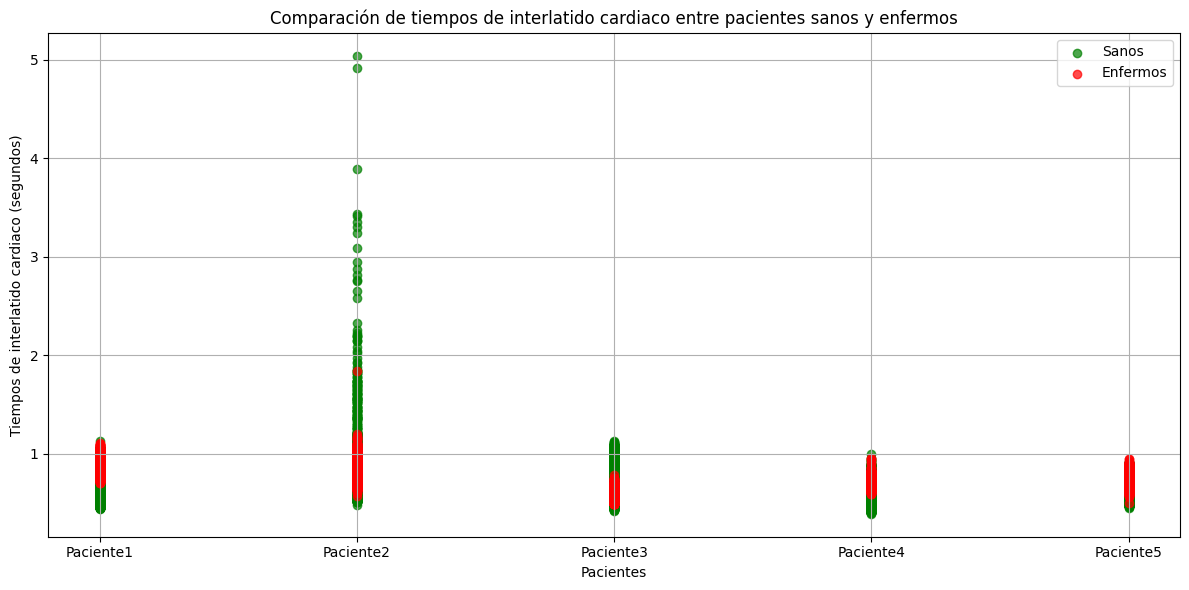

In [147]:
# Cargar los datos de pacientes sanos y enfermos
df_sanos = obtener_pacientes(ruta_sanos)
df_enfermos = obtener_pacientes(ruta_enfermos)

# Visualización de los tiempos de interlatido cardiaco por tipo de paciente
plt.figure(figsize=(12, 6))

# Gráfico de dispersión para pacientes sanos
plt.scatter(df_sanos['Paciente'], df_sanos['Tiempos de interlatido'], label='Sanos', color='green', alpha=0.7)

# Gráfico de dispersión para pacientes enfermos
plt.scatter(df_enfermos['Paciente'], df_enfermos['Tiempos de interlatido'], label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Pacientes')
plt.ylabel('Tiempos de interlatido cardiaco (segundos)')
plt.title('Comparación de tiempos de interlatido cardiaco entre pacientes sanos y enfermos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Medidas de tendencia central

## Media

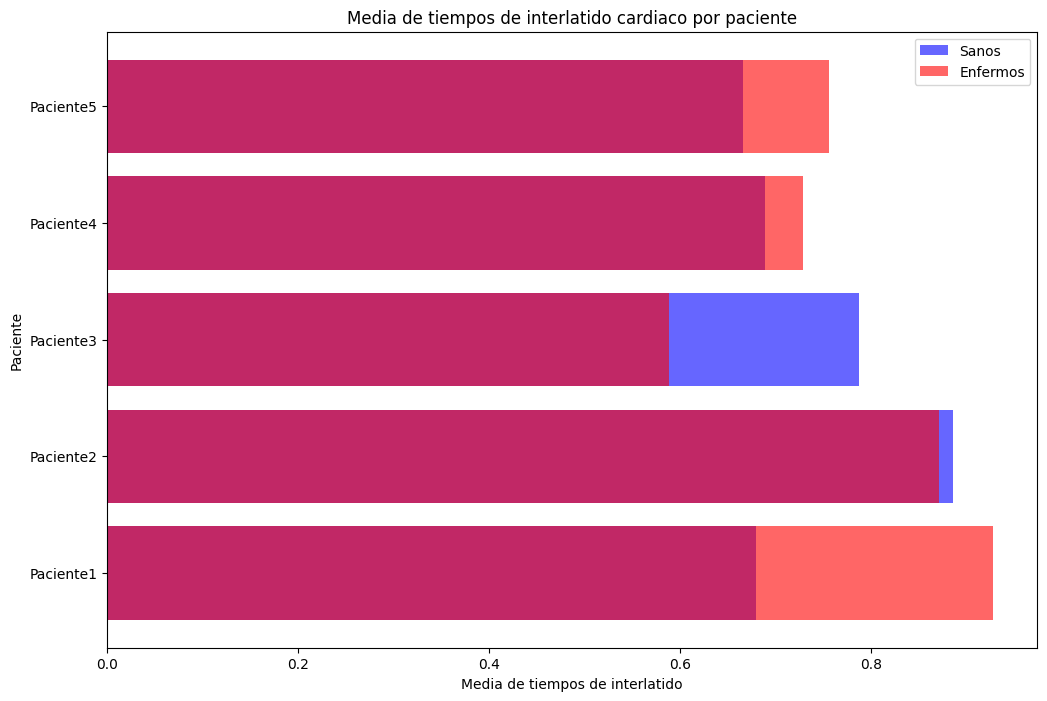

Media de tiempos de interlatido por paciente (Sanos):
Paciente
Paciente1    0.679775
Paciente2    0.886414
Paciente3    0.787494
Paciente4    0.689301
Paciente5    0.665767
Name: Tiempos de interlatido, dtype: float64

Media de tiempos de interlatido por paciente (Enfermos):
Paciente
Paciente1    0.928211
Paciente2    0.871537
Paciente3    0.589019
Paciente4    0.729203
Paciente5    0.756797
Name: Tiempos de interlatido, dtype: float64


In [144]:
# Media
# Calcular la media de los tiempos de interlatido por paciente
media_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].mean()
media_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].mean()

# Preparar datos para el gráfico de barras
pacientes_sanos = media_sanos.index
tiempos_sanos = media_sanos.values

pacientes_enfermos = media_enfermos.index
tiempos_enfermos = media_enfermos.values

# Graficar gráfico de barras
plt.figure(figsize=(12, 8))

plt.barh(pacientes_sanos, tiempos_sanos, label='Sanos', color='blue', alpha=0.6)
plt.barh(pacientes_enfermos, tiempos_enfermos, label='Enfermos', color='red', alpha=0.6)

plt.xlabel('Media de tiempos de interlatido')
plt.ylabel('Paciente')
plt.title('Media de tiempos de interlatido cardiaco por paciente')
plt.legend()

plt.show()

# Imprimir las medias
print("Media de tiempos de interlatido por paciente (Sanos):")
print(media_sanos)
print("\nMedia de tiempos de interlatido por paciente (Enfermos):")
print(media_enfermos)

## Mediana

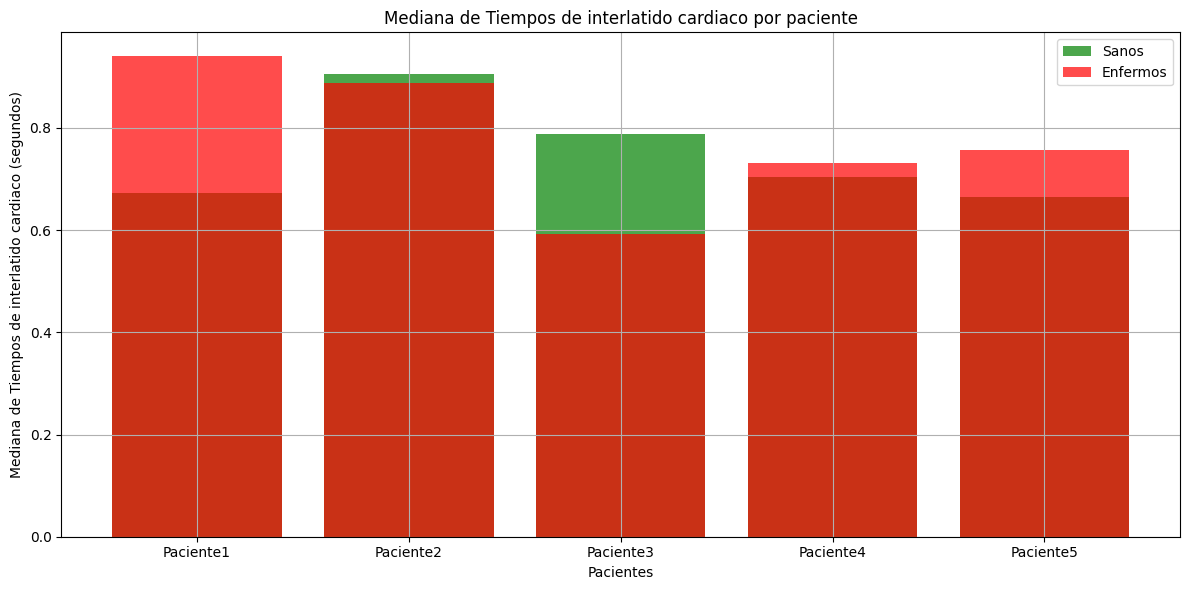

In [150]:
# Calcular la mediana de los tiempos de interlatido por paciente
mediana_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].median()
mediana_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].median()

# Graficar la mediana de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(mediana_sanos.index, mediana_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(mediana_enfermos.index, mediana_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Pacientes')
plt.ylabel('Mediana de Tiempos de interlatido cardiaco (segundos)')
plt.title('Mediana de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Varianza

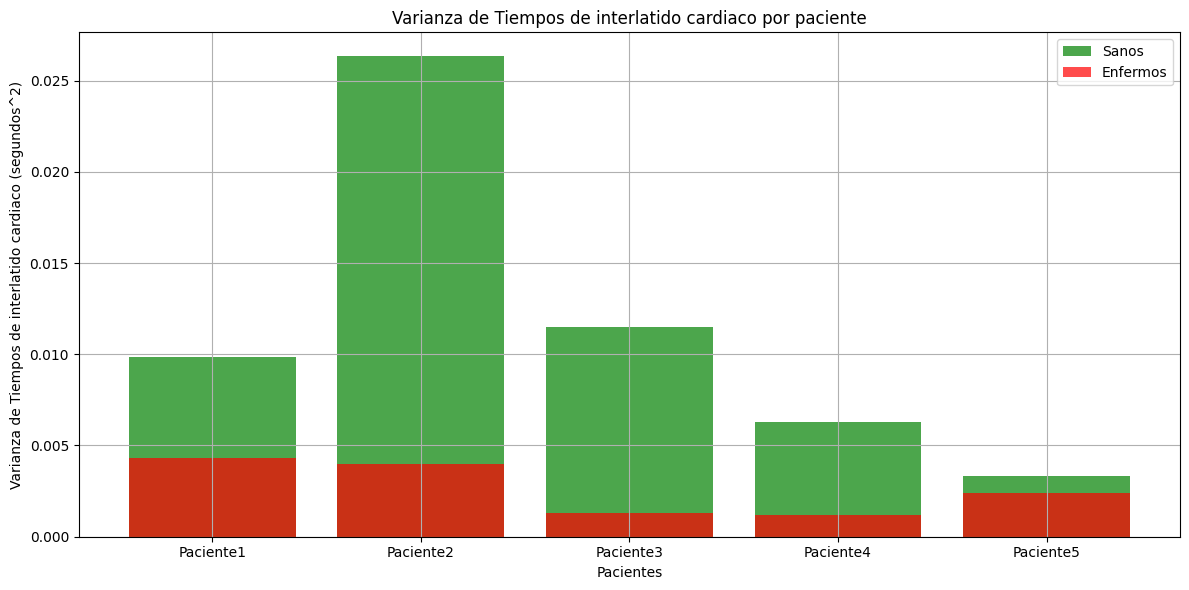

In [151]:
# Calcular la varianza de los tiempos de interlatido por paciente
varianza_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].var()
varianza_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].var()

# Graficar la varianza de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(varianza_sanos.index, varianza_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(varianza_enfermos.index, varianza_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Pacientes')
plt.ylabel('Varianza de Tiempos de interlatido cardiaco (segundos^2)')
plt.title('Varianza de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Desviación estándar

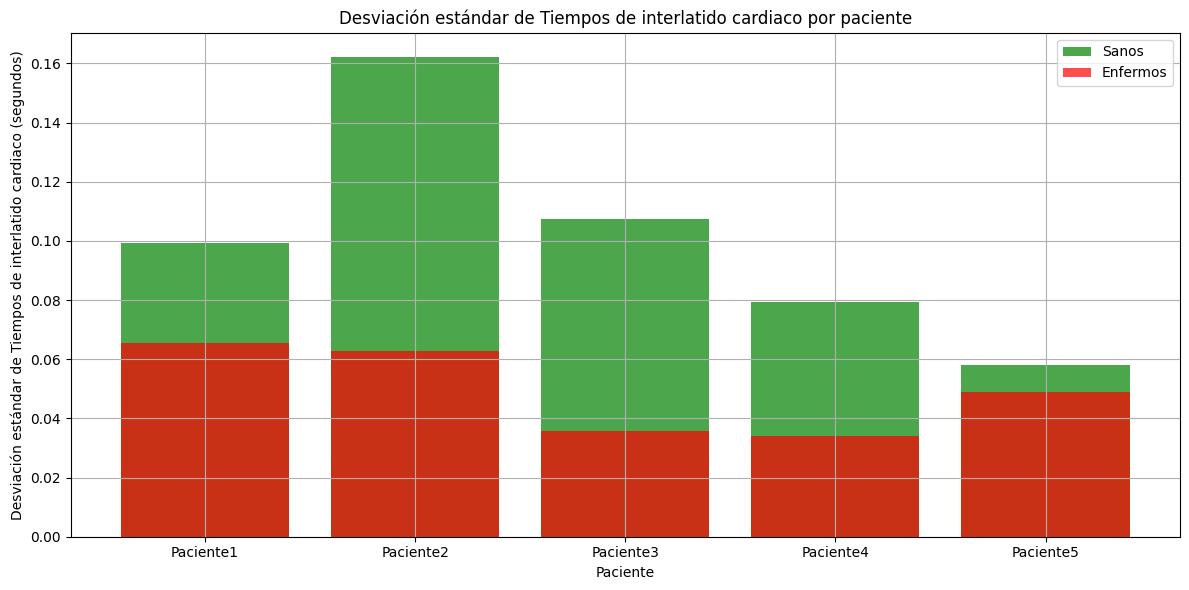

In [152]:
# Calcular la desviación estándar de los tiempos de interlatido por paciente
std_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].std()
std_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].std()

# Graficar la desviación estándar de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(std_sanos.index, std_sanos.values, label='Sanos', color='green', alpha=0.7)

# Gráfico de barras para pacientes enfermos
plt.bar(std_enfermos.index, std_enfermos.values, label='Enfermos', color='red', alpha=0.7)

plt.xlabel('Paciente')
plt.ylabel('Desviación estándar de Tiempos de interlatido cardiaco (segundos)')
plt.title('Desviación estándar de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Moda

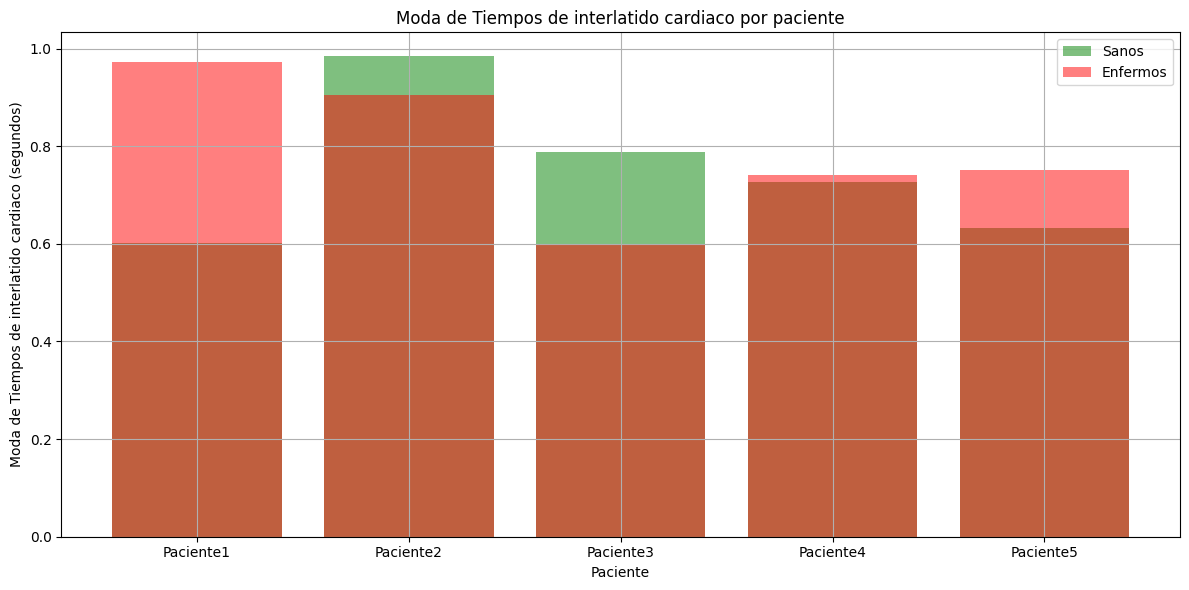

In [156]:
# Calcular la moda de los tiempos de interlatido por paciente
moda_sanos = df_sanos.groupby('Paciente')['Tiempos de interlatido'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
moda_enfermos = df_enfermos.groupby('Paciente')['Tiempos de interlatido'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Graficar la moda de tiempos de interlatido por paciente
plt.figure(figsize=(12, 6))

# Gráfico de barras para pacientes sanos
plt.bar(moda_sanos.index, moda_sanos.values, label='Sanos', color='green', alpha=0.5)

# Gráfico de barras para pacientes enfermos
plt.bar(moda_enfermos.index, moda_enfermos.values, label='Enfermos', color='red', alpha=0.5)

plt.xlabel('Paciente')
plt.ylabel('Moda de Tiempos de interlatido cardiaco (segundos)')
plt.title('Moda de Tiempos de interlatido cardiaco por paciente')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()